In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAX_STEPS = 10000

In [3]:
def get_action(state, weights):
    """
    Return action: move cart to left or right depending on dot product of state vector and params.
    """
    return 1 if state.dot(weights) > 0 else 0

In [4]:
def play_one_episode(env, params):
    """
    Play one episode and return the length of episode (a proxy for total reward)
    """
    obs = env.reset()
    done = False
    t = 0
    while not done and t < MAX_STEPS:
        t += 1
        action = get_action(obs, params)
        obs, reward, done, info = env.step(action)
        if done:
            break
    
    return t        

In [8]:
def play_multiple_eposides(env, params, N_episodes):
    """
    Play multiple episodes using current environment and params.
    Return average length for the number of played episodes.
    """

    episode_length = np.empty(N_episodes)
    for t in range(N_episodes):
        episode_length[t] = play_one_episode(env, params)
    
    avg_length = episode_length.mean()
    return avg_length

In [9]:
def random_search(env):
    """
    Search the parameter space (params), random numbers chosen between -1 and 1
    for longest average length.
    """
    episode_lengths = []
    best_length = 0
    params = None
    for t in range(100):
        new_params = np.random.random(4)*2 - 1
        avg_length = play_multiple_eposides(env, new_params, N_episodes=100)
        episode_lengths.append(avg_length)
        
        if avg_length > best_length:
            best_length = avg_length
            params = new_params
    return episode_lengths, params     

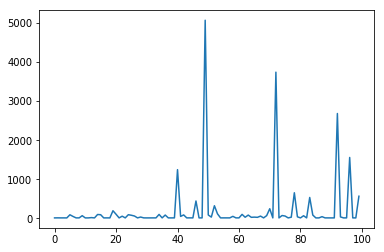

In [11]:
env = gym.make('CartPole-v0')
env._max_episode_steps = MAX_STEPS
episode_lengths, params = random_search(env)
plt.plot(episode_lengths)
plt.show()

In [12]:
params

array([0.20042053, 0.19999294, 0.56737538, 0.57541169])

In [13]:
np.random.random(4)*2 - 1

array([0.66335587, 0.57943291, 0.34200748, 0.41803327])

In [15]:
env.action_space.n

2